In [2]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

teams_stats = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/data/raw/england-premier-league-teams-2018-to-2019-stats.csv")
teams_stats

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,12,1,8,18,16,21,26,11,42,5
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,4,8,10,5,11,0,34,26,42,11
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,4,2,3,5,0,11,11,5,16,5
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,...,7,1,9,18,16,21,42,42,42,5
4,Crystal Palace FC,Crystal Palace,2018/2019,England,38,19,19,0,14,5,...,8,8,11,18,26,11,45,47,42,11
5,Everton FC,Everton,2018/2019,England,38,19,19,0,15,10,...,10,5,4,24,21,26,37,26,47,11
6,Burnley FC,Burnley,2018/2019,England,38,19,19,0,11,7,...,10,4,15,18,11,26,53,53,53,0
7,Southampton FC,Southampton,2018/2019,England,38,19,19,0,9,5,...,5,4,14,32,42,21,45,32,58,8
8,AFC Bournemouth,AFC Bournemouth,2018/2019,England,38,19,19,0,13,8,...,8,6,11,16,26,5,50,32,68,11
9,Manchester United FC,Manchester United,2018/2019,England,38,19,19,0,19,10,...,7,7,7,24,32,16,26,16,37,8


In [3]:
teams_stats = teams_stats[['common_name', 'wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away', 'points_per_game', 'points_per_game_home', 'points_per_game_away', 'goals_scored', 'goals_conceded', 'goals_scored_home', 'goals_scored_away', 'goals_conceded_home', 'goals_conceded_away', 'clean_sheets', 'clean_sheets_home', 'clean_sheets_away', 'corners_total_home', 'corners_total_away', 'cards_total']]
teams_stats = teams_stats.sort_index()
teams_stats

,common_name,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,...,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,clean_sheets,clean_sheets_home,clean_sheets_away,corners_total_home,corners_total_away,cards_total
0,Arsenal,21,14,7,7,3,4,10,2,8,...,42,31,16,35,8,7,1,125,84,76
1,Tottenham Hotspur,23,12,11,2,2,0,13,5,8,...,34,33,16,23,13,7,6,102,92,62
2,Manchester City,32,18,14,2,0,2,4,1,3,...,57,38,12,11,20,9,11,154,144,46
3,Leicester City,15,8,7,7,3,4,16,8,8,...,24,27,20,28,10,6,4,108,102,67
4,Crystal Palace,14,5,9,7,5,2,17,9,8,...,19,32,23,30,12,7,5,130,75,62
5,Everton,15,10,5,9,4,5,14,5,9,...,30,24,21,25,14,9,5,119,96,63
6,Burnley,11,7,4,7,2,5,20,10,10,...,24,21,32,36,8,5,3,80,60,77
7,Southampton,9,5,4,12,8,4,17,6,11,...,27,18,30,35,7,3,4,101,93,77
8,AFC Bournemouth,13,8,5,6,5,1,19,6,13,...,30,26,25,45,10,6,4,96,95,62
9,Manchester United,19,10,9,9,6,3,10,3,7,...,33,32,25,29,7,2,5,116,84,81


<Axes: >

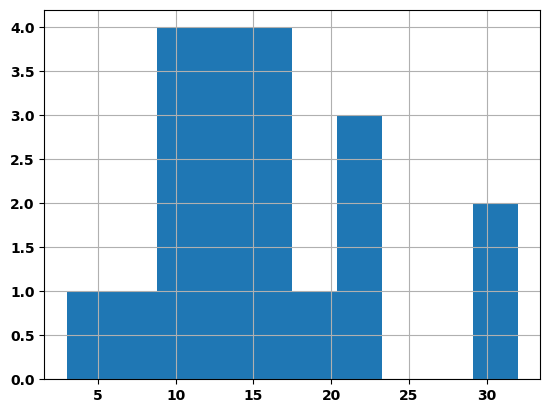

In [4]:
wins = teams_stats.wins
wins.hist()

c:\Users\diogo\anaconda3.0\envs\statistics_book\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='wins', ylabel='Density'>

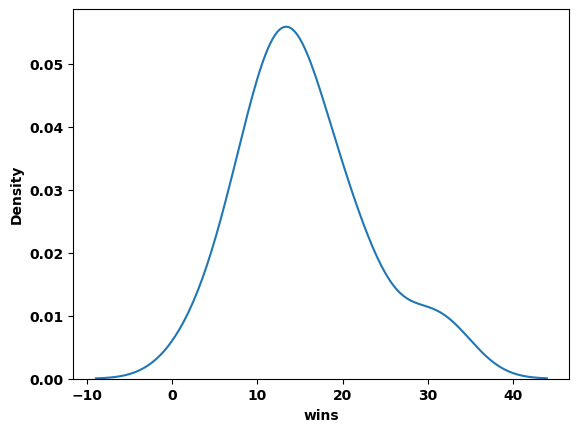

In [5]:
sns.kdeplot(wins)

In [6]:
teams_stats.dtypes

common_name              object
wins                      int64
wins_home                 int64
wins_away                 int64
draws                     int64
draws_home                int64
draws_away                int64
losses                    int64
losses_home               int64
losses_away               int64
points_per_game         float64
points_per_game_home    float64
points_per_game_away    float64
goals_scored              int64
goals_conceded            int64
goals_scored_home         int64
goals_scored_away         int64
goals_conceded_home       int64
goals_conceded_away       int64
clean_sheets              int64
clean_sheets_home         int64
clean_sheets_away         int64
corners_total_home        int64
corners_total_away        int64
cards_total               int64
dtype: object

In [7]:
teams_stats.describe()

,wins,wins_home,wins_away,draws,draws_home,draws_away,losses,losses_home,losses_away,points_per_game,...,goals_scored_home,goals_scored_away,goals_conceded_home,goals_conceded_away,clean_sheets,clean_sheets_home,clean_sheets_away,corners_total_home,corners_total_away,cards_total
count,20.000000,20.000000,20.000000,20.00000,20.00000,20.00000,20.000000,20.000000,20.00000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,15.450000,9.050000,6.400000,7.10000,3.55000,3.55000,15.450000,6.400000,9.05000,1.40600,...,29.800000,23.800000,23.800000,29.800000,10.350000,5.950000,4.400000,108.800000,86.60000,65.750000
std,7.250953,4.019361,3.560012,2.44734,1.90498,1.79106,6.778255,3.761299,3.54631,0.55311,...,11.542142,7.831112,7.878017,9.225822,4.522168,2.605157,2.458069,18.074699,19.69344,11.391941
min,3.000000,2.000000,1.000000,2.00000,0.00000,0.00000,1.000000,0.000000,1.00000,0.42000,...,10.000000,12.000000,10.000000,11.000000,5.000000,2.000000,1.000000,80.000000,59.00000,41.000000
25%,10.750000,6.000000,4.000000,6.75000,2.00000,2.00000,12.250000,4.500000,7.75000,1.04500,...,23.500000,18.000000,19.000000,25.000000,7.000000,4.000000,2.750000,95.750000,74.50000,61.750000
50%,14.500000,8.000000,6.000000,7.00000,3.00000,4.00000,16.000000,6.000000,8.00000,1.34500,...,27.500000,24.000000,25.000000,29.500000,9.500000,5.500000,4.000000,108.000000,85.00000,65.000000
75%,19.500000,10.500000,9.000000,9.00000,5.00000,5.00000,19.250000,9.250000,11.25000,1.76500,...,33.250000,31.250000,28.500000,35.000000,12.250000,7.000000,5.250000,119.250000,95.00000,74.500000
max,32.000000,18.000000,14.000000,12.00000,8.00000,8.00000,28.000000,14.000000,16.00000,2.58000,...,57.000000,38.000000,38.000000,45.000000,21.000000,12.000000,11.000000,154.000000,144.00000,85.000000


<Axes: >

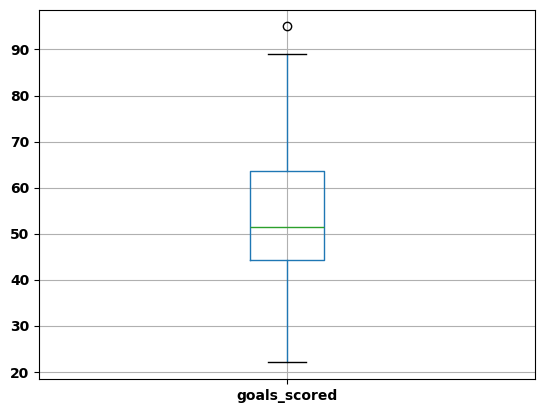

In [8]:
teams_stats.boxplot(column='goals_scored')